In [1]:
from skimage import io
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np
import cv2

In [2]:
image = io.imread('perempuan.jpg', as_gray=True)

In [3]:
image.shape, image.dtype

((170, 170), dtype('float64'))

In [4]:
M,N = image.shape

In [5]:
M,N

(170, 170)

Text(0.5, 1.0, 'Original Noisy Image')

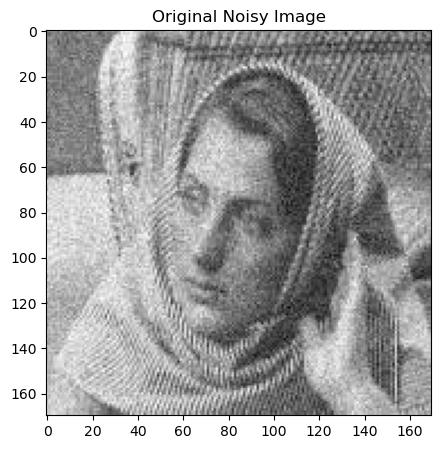

In [6]:
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image, cmap = "gray")
ax.set_title('Original Noisy Image')

In [7]:
#Return multidemensional discrete Fourier transform.
F = fftpack.fft2(image)
F_magnitude = np.abs(F) #absolute value of F

In [8]:
#show the results

def plot_spectrum(F):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(F), norm=LogNorm(vmin=5))
    plt.colorbar()

Text(0.5, 1.0, 'Fourier transform')

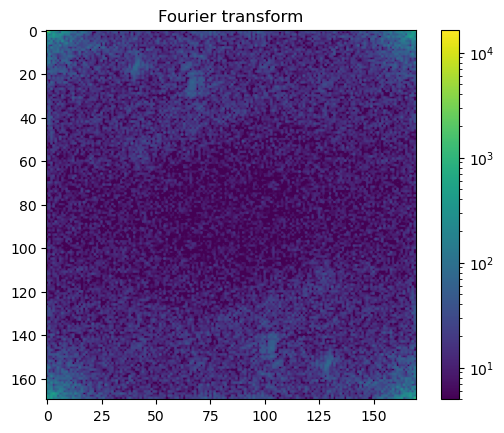

In [9]:
#A logarithmic colormap

plt.figure()
plot_spectrum(F)
plt.title('Fourier transform')

In [10]:
#using shift to centering high frequency

Fs = fftpack.fftshift(F)

Text(0.5, 1.0, 'Shift Transformation Result')

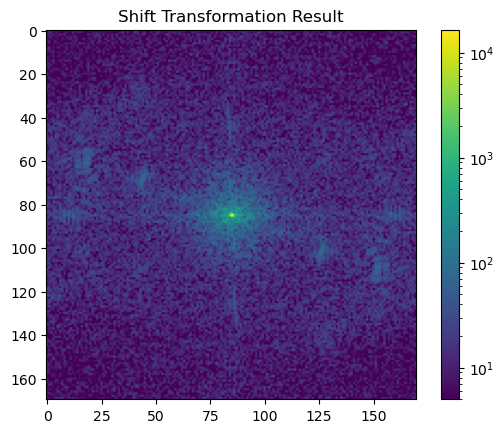

In [11]:
plt.figure()
plot_spectrum(Fs)
plt.title('Shift Transformation Result')

In [13]:
for j in range(115, 126):
    for i in range (12, 22):
        Fs[i,j] = 0
    for i in range (37, 47):
        Fs[i,j] = 0
    for i in range (56, 66):
        Fs[i,j] = 0
    for i in range (76, 86):
        Fs[i,j] = 0
    for i in range (94, 104):
        Fs[i,j] = 0
    for i in range (158, 168):
        Fs[i,j] = 0

C:\Users\ACER\AppData\Local\Temp\ipykernel_668\1420656708.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(Fs)), cmap='gray');


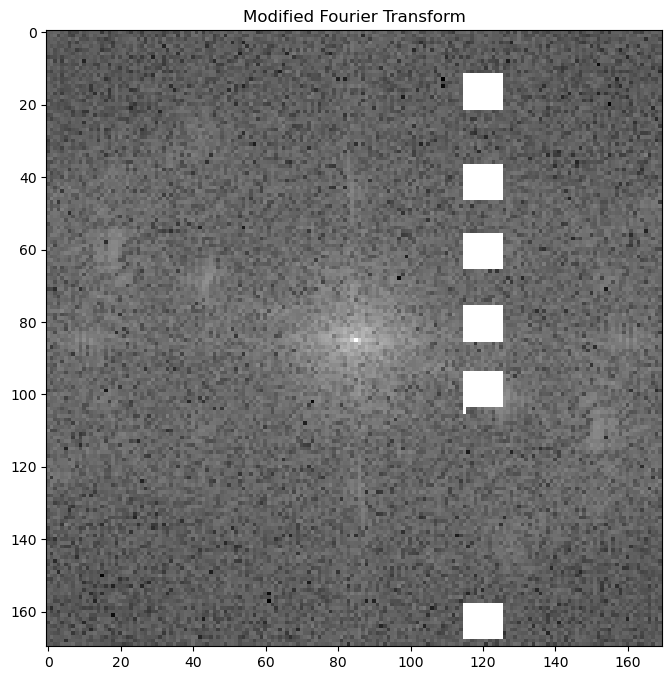

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(np.log(abs(Fs)), cmap='gray');
plt.title('Modified Fourier Transform');

In [15]:
#unshift

Fus = fftpack.ifftshift(Fs)

In [16]:
#inverse FFT

im_new = fftpack.ifft2(Fus).real

Text(0.5, 1.0, 'Reconstructed Image')

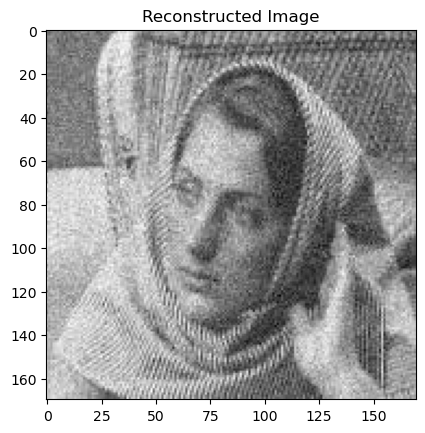

In [17]:
plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')